# MATH 2071 Lab 6 - Solving linear systems

Matthew Ragoza

2022-02-09

In [1]:
%matplotlib inline
import sys
from time import time
import numpy as np
from numpy.linalg import norm
import scipy as sp
from scipy import sparse
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

sys.path.append('../lab-5/code')
import gallery

# Exercise 1 - Matrix inversion

The purpose of this exercise is to measure the efficiency of solving a linear system $Ax=b$ by first computing the inverse matrix $A^{-1}$ and then multiplying it by the righthand side to get the solution $x = A^{-1}b$.

To help benchmark this method and the other methods implemented in this lab, I created a timer function that can be used to time an arbitary function call.

In [2]:
def timer(f):
    def wrapper(*args, **kwargs):
        t0 = time()
        ret = f(*args, **kwargs)
        dt = time() - t0
        return ret, dt
    return wrapper

I created a function called `exercise1` that creates a magic matrix of a given size and a simple righthand side vector of ones. It then computes the solution to the linear system by using the matrix inversion approach. The time taken to compute the solution is then returned from the function.

In [3]:
def inv_solve(A, b):
    '''
    Solve A x = b for x by
    computing x = A^-1 b.
    '''
    A_inv = np.linalg.inv(A)
    return A_inv @ b

def exercise1(n):
    A = gallery.magic_matrix(n)
    b = np.ones((n, 1))
    x, dt = timer(inv_solve)(A, b)
    return dt

exercise1(n=10)

0.006906986236572266

I tested this method by measuring the solution time for linear systems of 7 different sizes. I collected the runtimes into a data frame and I computed the runtimes normalized by the cubed system size $n^3$. I also computed the ratio between the runtimes for increasing system sizes. I displayed these results in a table below.

In [7]:
data = []
for n in [161, 321, 641, 1281, 2561, 5121, 10241]:
    print(n, end='...')
    dt = exercise1(n)
    data.append((n, dt))

print('done')

df = pd.DataFrame(data, columns=['n', 'dt'])
df['dt_n3'] = df['dt'] / df['n']**3
df['dt_ratio'] = df['dt'] / df['dt'].shift(1)
df.set_index('n')

161...321...641...1281...2561...5121...10241...done


,dt,dt_n3,dt_ratio
n,,,
161,0.000836,2.002970e-10,NaN
321,0.001821,5.504158e-11,2.177981
641,0.012919,4.905069e-11,7.095993
1281,0.089898,4.276633e-11,6.958734
2561,0.645592,3.843525e-11,7.181399
5121,3.394247,2.527430e-11,5.257569
10241,25.733005,2.395871e-11,7.581360


As the the system size increases, the runtime scales proportionate to the cube of the system size. This can be seen by the relatively constant value of $dt$ normalized by $n^3$ in the table above. In addition, when doubling the system size, the runtime increased by a factor of about 6, which indicates slightly less than cubic time complexity.

In [8]:
df['dt_ratio'].mean()

6.04217237925359

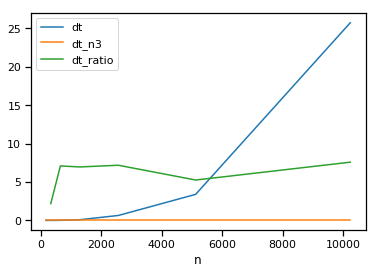

In [10]:
df.plot(x='n')

# Exercise 2 - Gaussian elimination

The objective of this exercise is to compare the runtime of the matrix inversion method to the standard `np.linalg.solve` method of solving a linear system, which uses Gaussian elimination. By comparing their runtime on the same set of linear systems, we will determine which algorithm is faster.

I implemented a function `exercise2` which is exactly the same as `exercise1`, except that it uses the standard Gaussian elimination-based solver instead of matrix inversion.

In [11]:
def exercise2(n):
    A = gallery.magic_matrix(n)
    b = np.ones((n, 1))
    x, dt = timer(np.linalg.solve)(A, b)
    return dt

exercise2(n=10)

0.0010800361633300781

I ran the same experimented as before with the Gaussian elimination solver. I evaluated the method on a set of linear systems of different sizes with coefficients defined by a magic matrix. I collected the runtimes of each solution into a data frame and computed the normalized runtimes and growth ratios. Then I displayed this information in a table.

In [15]:
data = []
for n in [161, 321, 641, 1281, 2561, 5121, 10241]:
    print(n, end='...')
    dt = exercise2(n)
    data.append((n, dt))

print('done')

df = pd.DataFrame(data, columns=['n', 'dt'])
df['dt_n3'] = df['dt'] / df['n']**3
df['dt_ratio'] = df['dt'] / df['dt'].shift(1)
df.set_index('n')

161...321...641...1281...2561...5121...10241...done


,dt,dt_n3,dt_ratio
n,,,
161,0.000321,7.701093e-11,NaN
321,0.000633,1.914490e-11,1.970326
641,0.005227,1.984478e-11,8.253765
1281,0.026078,1.240574e-11,4.989417
2561,0.172781,1.028650e-11,6.625619
5121,1.014531,7.554415e-12,5.871764
10241,7.184830,6.689435e-12,7.081925


It is evident that the runtime of Gaussian elimination also scales with the cube of the system size. The mean growth ratio of 5.8 suggests slightly less than cubic time complexity. However, in absolute terms the times are about three times faster with this method than with matrix inversion. The largest system was solved in about 7 seconds compared to 25 seconds using the matrix inverse. These results are consistent with theory, which states that Gaussian elimination should be three times faster than matrix inversion for solving a linear system.

In [17]:
df['dt_ratio'].mean()

5.7988028989945954

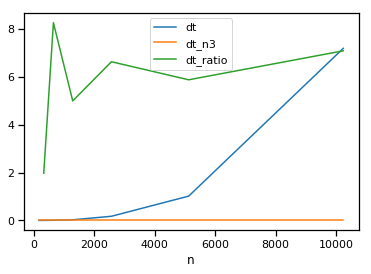

In [18]:
df.plot(x='n')

# Exercise 3 - Sparse matrices

The goal of this exercise is to understand how sparse matrices can be leveraged to reduce the complexity of solving linear systems with sparse coefficients. When many matrix entries are zero, they don't need to be explicitly represented in memory or used in some computations. Efficient data structures and algorithms have been developed for working with sparse matrices.

I implemented a function `exercise3` that solves a linear system defined by a sparse matrix using the sparse linear system solver `scipy.sparse.linalg.spsolve`. The runtime of the numerical solution is measured and returned.

In [19]:
def exercise3(n):
    A = gallery.dif2_sparse(n)
    b = np.ones((n, 1))
    x, dt = timer(sparse.linalg.spsolve)(A, b)
    return dt

exercise3(n=10)

0.004476785659790039

I ran another experiment to assess the time complexity of the sparse linear system solver. However, I evaluated linear systems of much larger size, ranging from 10,000 to 10,000,000. I measured the runtime of each call, the normalized runtime, and growth ratio. I then displayed these values in a table below.

In [38]:
data = []
for n in [10000, 100000, 1000000, 10000000]:
    print(n, end='...')
    dt = exercise3(n)
    data.append((n, dt))

print('done')

df = pd.DataFrame(data, columns=['n', 'dt'])
df['dt_n3'] = df['dt'] / df['n']**3
df['dt_ratio'] = df['dt'] / df['dt'].shift(1)
df.set_index('n')

10000...100000...1000000...10000000...done


,dt,dt_n3,dt_ratio
n,,,
10000,0.005496,5.496264e-15,NaN
100000,0.053558,5.355835e-17,9.744502
1000000,0.725942,7.259417e-19,13.554220
10000000,7.382852,1.904849e-18,10.170035


The solution times for the sparse systems are much, much smaller than for the previous two methods. The largest system was solved in about 7.5 seconds, which is how long it took to solve a dense matrix that was almost a thousand times smaller using standard Gaussian elimination. The mean runtime growth factor was about 11 when increasing the system size by a factor of 10, which implies that solving a sparse matrix has nearly linear time complexity.

In [41]:
df['dt_ratio'].mean()

11.156252189174246

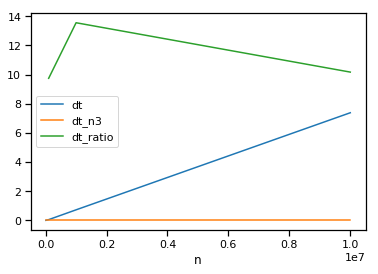

In [42]:
df.plot(x='n')

I created a copy `exercise3` below that solves the same matrix using the linear solution method that does not leverage the sparsity. I called the function on a system of size 10,240 and found that the runtime was about 7 seconds. The sparse solver was able to solve a matrix of similar size in less than 6 ms, which is a three order of magnitude improvement.

In [43]:
def exercise3b(n):
    A = gallery.dif2_matrix(n)
    b = np.ones((n, 1))
    x, dt = timer(np.linalg.solve)(A, b)
    return dt

exercise3b(n=10240)

7.275636434555054

# Exercise 4 - Determinant vs. condition number

The purpose of this exercise is to demonstrate why the determinant of a matrix is not a good indicator for whether we can accurately solve a linear system defined by that matrix. We will see that the condition number is a far better measure of how reliable our approximate solutions are for a given matrix.

I defined a function `exercise4` which creates a matrix of a certain type and size and computes both its determinant and its condition number. Then, it creates a true solution for a system defined by the matrix and computes the righthand side using matrix multiplication. Next, an approximate solution for the system is computed by `np.linalg.solve` as well as the relative error of the approximate solution. The error, determinant, and condition number are then returned from the function.

In [44]:
def exercise4(n, matrix):
    A = matrix(n)
    d = np.linalg.det(A)
    c = np.linalg.cond(A)
    x = np.ones(n)
    b = A @ x
    xhat = np.linalg.solve(A, b)
    e = norm(x-xhat) / norm(x)
    return e, d, c

I called this function with four different types of matrices and four different sizes of each matrix. I collected the outputs into a data frame and then displayed them in a table.

In [45]:
data = []
for m in ['dif2', 'frank', 'hilbert', 'pascal']:
    matrix = getattr(gallery, f'{m}_matrix')
    for n in [5, 10, 15, 20]:
        e, d, c = exercise4(n, matrix)
        data.append((m, n, e, d, c))
        
df = pd.DataFrame(data, columns=['matrix', 'n', 'error', 'det', 'cond'])
df.set_index(['matrix', 'n'])

error            det          cond
matrix  n                                            
dif2    5   4.965068e-17   6.000000e+00  1.392820e+01
        10  3.510833e-17   1.100000e+01  4.837415e+01
        15  2.866584e-17   1.600000e+01  1.030869e+02
        20  3.933074e-16   2.100000e+01  1.780643e+02
frank   5   4.506193e-15   1.000000e+00  6.474683e+02
        10  2.004663e-11   1.000000e+00  2.854322e+07
        15  1.352896e-05   1.000000e+00  1.371012e+13
        20  6.239376e+01   1.000000e+00  5.247996e+17
hilbert 5   1.807766e-11   3.749295e-12  4.766073e+05
        10  4.170709e-04   2.164453e-53  1.602503e+13
        15  4.214064e+00 -1.232108e-120  2.495952e+17
        20  3.062749e+01  7.453419e-196  2.106531e+18
pascal  5   0.000000e+00   1.000000e+00  8.517524e+03
        10  1.117939e-07   1.000000e+00  4.155206e+09
        15  5.447335e-02   1.000538e+00  2.839712e+15
        20  1.572035e+03   2.782629e+01  2.246502e+21

To better analyze the results of this experiment, I also plotted the data below.

/home/mtr22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/home/mtr22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


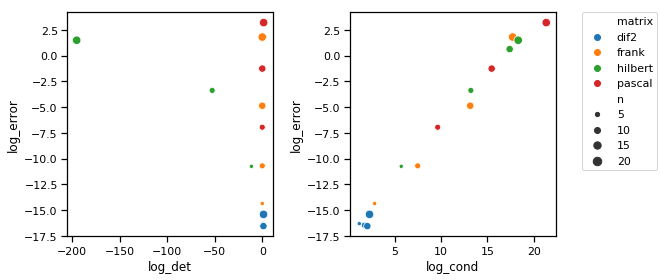

In [46]:
df['log_det'] = np.log10(df['det'])
df['log_cond'] = np.log10(df['cond'].abs())
df['log_error'] = np.log10(df['error'].abs())
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.scatterplot(data=df, x='log_det', y='log_error', hue='matrix', size='n', ax=axes[0])
sns.scatterplot(data=df, x='log_cond', y='log_error', hue='matrix', size='n', ax=axes[1])
handles, labels = axes[0].get_legend_handles_labels()
axes[0].get_legend().remove()
axes[1].get_legend().remove()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1,0.95))
fig.tight_layout()

These scatter plots show the log error compared to the log absolute value of the determinant or the log of the condition number. The relationship between the error and the determinant is unclear. The Hilbert matrices are nearly singular and have large error, but the relationship is nonlinear. Furthermore, the Frank and Pascal matrices all have determinant of exactly 1, but their error increases with the size of the matrix.

In contrast, there is a strong positive correlation between the log of the condition number and the log of the error, regardless of matrix type or size. This is clear evidence that condition number is a more useful indication of numerical solution accuracy than the determinant.

# Exercise 5 - LU decomposition

In this exercise, the goal is to understand the implementation details of the LU decomposition and its relation to Gaussian elimination.

I implemented a function `lu_factor(A)` that takes a square matrix $A$ as input and returns a lower triangular matrix $L$ and an upper triangular matrix $U$ such that $LU = A$. The algorithm is nearly identical to the row reduction algorithm which is the first half of Gaussian elimination.

In [56]:
def lu_factor(A):
    
    n = A.shape[0]
    assert A.shape == (n, n)
    
    L = np.eye(n)
    U = A.copy()
    
    # iterate over pivot rows
    for i in range(n-1):

        # check if pivot is zero
        assert not np.isclose(U[i,i], 0), f'pivot {i} is zero'
        
        # compute and store multipliers in L
        L[i+1:,i] = U[i+1:,i] / U[i,i]
            
        # perform row reductions on U below pivot
        U[i+1:,i:] = U[i+1:,i:] - L[i+1:,i:i+1] * U[i:i+1,i:]

    return L, U

A = np.array([
    [2, 4],
    [1, 9]
])
L, U = lu_factor(A)
L @ U

array([[2., 4.],
       [1., 9.]])

# Exercise 5 - Testing LU decomposition

The purpose of this exercise is to verify that my implementation of LU factorization works correctly on a set of test matrices.

I wrote a function `exercise5` that creates a Hilbert matrix of a given size, then applies LU factorization to the matrix. The function returns that error as the norm of the difference between the original matrix and the product of L and U factors.

I then called the function using matrix size 5 and found that the error was very near to zero, indicating that my `lu_factor` method works as expected.

In [57]:
def exercise5(n):
    A = gallery.hilbert_matrix(n)
    L, U = lu_factor(A)
    return norm(A - L @ U)

exercise5(n=5)

5.003707553108401e-17

# Exercise 6 - Failure cases of LU decomposition

The purpose of this exercise is to examine and understand cases where the simple LU decomposition above can fail.

I implemented the function `exercise6` below which creates an LULU matrix from the gallery of a specific size, prints its condition number and determinant, then tries to factor it with my LU decomposition function. After that it uses `scipy.linalg.lu` to decompose the matrix instead and prints the resulting factors, as well as the norm of the error between the original matrix and the product of the factors.

In [58]:
def print_mat(**kwargs):
    for k, v in kwargs.items():
        print(f'{k} =\n{v}')

def exercise6(n):
    
    A = gallery.lulu_matrix(n)
    print_mat(A=A)
    
    c = np.linalg.cond(A)
    print(f'cond(A) = {c:.4f}')
    
    d = np.linalg.det(A)
    print(f'det(A)  = {d:.4f}')
    
    try:
        L, U = lu_factor(A)
    except AssertionError as e:
        print(f'lu_factor failed: {e}')

    P, L, U = sp.linalg.lu(A)
    
    print_mat(P=P)
    
    LU = L @ U
    print_mat(LU=np.round(LU))
    
    PLU = P @ LU
    print_mat(PLU=np.round(PLU))
    
    e = norm(A - PLU)
    print(f'error = {e}')
    
exercise6(n=5)

A =
[[-2.  1.  0.  0.  0.]
 [ 1.  0.  1. -2.  0.]
 [ 0.  0.  0.  1. -2.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]]
cond(A) = 15.4003
det(A)  = -8.0000
lu_factor failed: pivot 2 is zero
P =
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
LU =
[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 1. -0.  1. -2.  0.]
 [ 0.  0.  0.  1. -2.]]
PLU =
[[-2.  1.  0.  0.  0.]
 [ 1. -0.  1. -2.  0.]
 [ 0.  0.  0.  1. -2.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]]
error = 1.1443916996305594e-16


The matrix we were trying to factor was not ill-conditioned or singular, as seen by its condition number of 15.4 and determinant of -8. However, it can be seen from the printout above that the `lu_factor` method failed because there was a pivot entry of zero at $U_{2,2}$. I did not implement any pivoting strategies, so there was no way to proceed without dividing by zero in the row reduction steps. Therfore, an exception was raised.

The `scipy.linalg.lu` successfully factorized the matrix by applying pivoting in the form of an additional factor: the permutation matrix, $P$. The effect of multiplying by $P$ is to reorder the rows and/or columns of the matrix to move more optimal values into the pivot positions. This can be seen in the difference between the product matrices $LU$ and $PLU$, which have the same rows in different order. The error between the original matrix $A$ and the factor product $PLU$ is very close to zero, so the factorization was accurate.

# Exercise 7 - Permutation matrices

The goal of this exercise is to investigate how permutation matrices can be used to manipulate the row or column order of matrices.

For this part, I began by creating a magic matrix $A$ and two permutation matrices $P_1$ and $P_2$.

In [59]:
A = gallery.magic_matrix(4)
print_mat(A=A)

P1 = gallery.perm_matrix([0, 2, 1, 3])
print_mat(P1=P1)

P2 = gallery.perm_matrix([0, 3, 2, 1])
print_mat(P2=P2)

A =
[[16.  2.  3. 13.]
 [ 5. 11. 10.  8.]
 [ 9.  7.  6. 12.]
 [ 4. 14. 15.  1.]]
P1 =
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
P2 =
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


The matrix multiplication $P_1 A$ produces a matrix identical to $A$ with rows 1 and 2 swapped (using zero-based indexing), while $P_2 A$ produces a version of $A$ with rows 1 and 3 swapped.

In [60]:
P1A = P1 @ A
print_mat(P1A=P1A)

P2A = P2 @ A
print_mat(P2A=P2A)

P1A =
[[16.  2.  3. 13.]
 [ 9.  7.  6. 12.]
 [ 5. 11. 10.  8.]
 [ 4. 14. 15.  1.]]
P2A =
[[16.  2.  3. 13.]
 [ 4. 14. 15.  1.]
 [ 9.  7.  6. 12.]
 [ 5. 11. 10.  8.]]


The product $P_1^\top P_1 A$ is equal to the matrix $A$, because the product $P_1^\top P_1$ is equal to $I$. From this fact, we know that $P_1^\top = P_1^{-1}$, which is true for permutation matrices in general.

In [61]:
P1TP1A = P1.T @ P1A
print_mat(P1TP1A=P1TP1A)

P1TP1 = P1.T @ P1
print_mat(P1TP1=P1TP1)

P1TP1A =
[[16.  2.  3. 13.]
 [ 5. 11. 10.  8.]
 [ 9.  7.  6. 12.]
 [ 4. 14. 15.  1.]]
P1TP1 =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


The matrix multiply $A P_1$ is identical to $A$ but with columns 1 and 2 swapped. In general, left-multiplying by a permutation matrix swaps rows, while right-multiplying swaps columns.

In [62]:
AP1 = A @ P1
print_mat(AP1=AP1)

AP1 =
[[16.  3.  2. 13.]
 [ 5. 10. 11.  8.]
 [ 9.  6.  7. 12.]
 [ 4. 15. 14.  1.]]


Multiple permutation matrices can be composed to reorder multiple rows or columns of a matrix in various ways. The product $P_1 P_2$ combines two row swaps in one, so that $P_1 P_2 A$ is equal to $A$ with rows 1 and 2 swapped, followed by rows 1 and 3 swapped (or vice versa).

In [63]:
P1P2 = P1 @ P2
print_mat(P1P2=P1P2)

P1P2A = P1P2 @ A
print_mat(P1P2A=P1P2A)

P1P2 =
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
P1P2A =
[[16.  2.  3. 13.]
 [ 9.  7.  6. 12.]
 [ 4. 14. 15.  1.]
 [ 5. 11. 10.  8.]]


# Exercise 8 - PLU decomposition

The goal of this exercise is to extend the previous implementation of LU decomposition to handle zero pivots by using permutation matrices. For a given square matrix $A$, PLU decomposition finds a permutation matrix $P$, a lower triangular matrix $L$, and an upper triangular matrix $U$ such that $A = PLU$.

I copied the `lu_factor` function from earlier and replaced the check for zero pivots with the application of the partial pivoting. Each iteration of the outer loop begins by finding the largest pivot entry in the current column, at or below the current row. If there is a larger pivot entry below the current position, the rows are swapped in the $U$ and $L$ matrices and the columns are swapped in the $P$ matrix.

In [64]:
def plu_factor(A):
    '''
    Factorize the matrix A into a permutation
    matrix, a lower triangular matrix, and an
    upper triangular matrix.

    Args:
        A: N x N matrix.
    Returns
        P: N x N permutation matrix.
        L: N x N lower triangular matrix.
        U: N x N upper triangular matrix.
    '''
    # check input shape
    n = A.shape[0]
    assert A.shape == (n, n)
    
    P = np.eye(n)
    L = np.eye(n)
    U = A.copy()
    
    # iterate over pivot rows/columns
    for i in range(n-1):

        # find largest entry below pivot
        p = i + np.argmax(np.abs(U[i:,i]))
        
        if p > i: # swap rows i and p
            U[[i,p],:]  = U[[p,i],:]
            L[[i,p],:i] = L[[p,i],:i]
            P[:,[i,p]]  = P[:,[p,i]]

        # compute and store multipliers in L
        L[i+1:,i] = U[i+1:,i] / U[i,i]
            
        # perform row reductions on U below pivot
        U[i+1:,i:] = U[i+1:,i:] - L[i+1:,i:i+1] * U[i:i+1,i:]

    return P, L, U

A = gallery.pascal_matrix(3)
P, L, U = plu_factor(A)
PLU = P@L@U
print_mat(A=A, P=P, L=L, U=U, PLU=PLU)
norm(A - PLU)

A =
[[1. 1. 1.]
 [1. 2. 3.]
 [1. 3. 6.]]
P =
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
L =
[[1.  0.  0. ]
 [1.  1.  0. ]
 [1.  0.5 1. ]]
U =
[[ 1.   1.   1. ]
 [ 0.   2.   5. ]
 [ 0.   0.  -0.5]]
PLU =
[[1. 1. 1.]
 [1. 2. 3.]
 [1. 3. 6.]]


0.0

Next, I defined the function `exercise8(n, matrix)` which create a matrix of the given size and type, then performs PLU factorization. It computes the error between the product of the factors and the original matrix and returns the norm of the error.

In [65]:
def exercise8(n, matrix):
    A = matrix(n)
    P, L, U = plu_factor(A)
    PLU = P@L@U
    e = norm(A - PLU)
    return e

I performed a numerical evaluation using these methods on five different matrix types with sizes 5, 10 and 20. I recorded the error of each factorization and displayed them in a table.

In [66]:
data = []
for m in ['dif2', 'pascal', 'lulu']:
    matrix = getattr(gallery, f'{m}_matrix')
    for n in [5, 10, 20]:
        e = exercise8(n, matrix)
        data.append((m, n, e))
    
df = pd.DataFrame(data, columns=['matrix', 'n', 'error'])
df.set_index(['matrix', 'n'])

error
matrix n               
dif2   5   0.000000e+00
       10  0.000000e+00
       20  0.000000e+00
pascal 5   0.000000e+00
       10  1.021636e-11
       20  1.333713e-05
lulu   5   2.775558e-17
       10  2.775558e-17
       20  2.775558e-17

The error was very low for every matrix. The one outlier was the Pascal matrix of size 20, which had an error fo 1.3e-5. The other matrices had an error close to the machine epsilon, so the PLU decomposition method is quite accurate.

In [67]:
df['error'].median()

2.7755575615628914e-17

# Exercise 9 - PLU solution

The objective of this exercise is to use PLU decomposition to solve linear systems by breaking them down into simpler systems. Given a linear system and PLU decomposition:

$$
\begin{align}
    Ax &= b \\
    A &= PLU \\
    PLUx &= b
\end{align}
$$

We can break the problem down into the solution of three simpler linear systems:

$$
\begin{align}
    Pz &= b \\
    Ly &= z \\
    Ux &= y
\end{align}
$$

And we can solve these simpler systems very easily using the properties of the matrices. For example, $z = P^\top b$ because $P^\top = P^{-1}$ is a property of permutation matrices. The other two matrices can be solved in $O(n^2)$ time with forward- or back-substitution because they are triangular, so there is no need for row reduction.

We will implement this method of solving linear systems by considering the following example system, along with its PLU factorization and intermediate PLU solution vectors, as a test case.

In [68]:
# example linear system

A = np.array([
    [2, 6, 12],
    [1, 3,  8],
    [4, 4,  8]
])
b = np.array([28, 18, 16])

# PLU factorization

P = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]
])
L = np.array([
    [1.00, 0.0, 0.],
    [0.50, 1.0, 0.],
    [0.25, 0.5, 1.]
])
U = np.array([
    [4, 4, 8],
    [0, 4, 8],
    [0, 0, 2]
])

# solution vectors

z = np.array([16, 28, 18])
y = np.array([16, 20,  4])
x = np.array([-1,  1,  2])

First, I defined a function `p_solve(P, b)` which solves the linear system $Pz = b$ given a permutation matrix $P$ and righthand side $b$. The solution is simply $P^\top b$. I verified this using the example system, in which there is zero error in the generated solution.

In [69]:
def p_solve(P, b):
    '''
    Solve Pz = b, where P is
    a permutation matrix.
    '''
    # check input shapes
    n = P.shape[0]
    assert P.shape == (n, n)
    assert b.shape == (n,)
    
    return P.T @ b

norm(z - p_solve(P, b))

0.0

Next, I defined a function `l_solve(L, z)` that solves the linear system $Ly = z$ given a lower triangular matrix $L$ and a righthand side $z$. It uses a forward substitution approach. I verified that the error of the computed solution is very low on the example problem.

In [70]:
def l_solve(L, z):
    '''
    Solve Ly = z, where L is
    a lower triangular matrix.
    '''
    # check input shapes
    n = L.shape[0]
    assert L.shape == (n, n)
    assert z.shape == (n,)

    y = z.copy()
    for i in range(n):
        y[i] -= L[i,:i] @ y[:i]

    return y

norm(y - l_solve(L, z))

0.0

Thirdly, I defined a function `u_solve(U, y)` that solves the linear system $Ux = y$ given an upper triangular matrix $U$ and righthand side $y$. This is similar to the previous method, but uses back-substitution. Again, I verified that the error is neglibile on the example problem.

In [71]:
def u_solve(U, y):
    '''
    Solve Ux = y, where U is
    an upper triangular matrix.
    '''
    # check input shapes
    n = U.shape[0]
    assert U.shape == (n, n)
    assert y.shape == (n,)

    x = y.copy()
    for i in reversed(range(n)):
        x[i] -= U[i,i+1:] @ x[i+1:]
        x[i] /= U[i,i]

    return x

norm(x - u_solve(U, y))

0.0

Finally, I put all these solution methods together into a single function `plu_solve(A, b)`. The function first uses `plu_factor(A)` to obtain a $PLU$ decomposition of the matrix $A$. Then it uses `p_solve(P, b)` to solve the equation $Pz=b$ for $z$. Next it uses `l_solve(L, z)` to solve the equation $Ly=z$ for $y$. Thirdly it uses `u_solve(U, y)` to solve the equation $Ux = y$ for $x$, which is the solution to the original problem $Ax=b$. I verified that this method works by using it to solve the example problem, where it produced an error norm around zero.

In [72]:
def plu_solve(A, b):
    '''
    Solve Ax = b using
    PLU decomposition.
    '''
    P, L, U = plu_factor(A)
    z = p_solve(P, b)
    y = l_solve(L, z)
    x = u_solve(U, y)
    return x

norm(x - plu_solve(A, b))

0.0

# Exercise 10 - Testing PLU solution

The goal of this exercise is to evaluate the `plu_solve` function on a variety of matrix types to verify its correctness.

I wrote a function `exercise10(n, matrix)` that uses the PLU solution method to solve a linear system of the given size and type. It then computes the relative residual and error and returns them from the function.

In [80]:
def exercise10(n, matrix):
    A = matrix(n)
    x = np.arange(n)
    b = A @ x
    xhat = plu_solve(A, b)
    r = norm(b - A @ xhat) / norm(b)
    e = norm(x - xhat) / norm(x)
    return r, e

I experimented with solving four differenty types of matrices of size 5 using the PLU factorization method. For each system, I collected the parameters, residuals, and errors into a data frame, which I then printed as a table.

In [81]:
data = []
for m in ['dif2', 'frank', 'hilbert', 'pascal']:
    matrix = getattr(gallery, f'{m}_matrix')
    for n in [5]:
        r, e = exercise10(n, matrix)
        data.append((m, n, r, e))
        
df = pd.DataFrame(data, columns=['matrix', 'n', 'residual', 'error'])
df.set_index(['matrix', 'n'])

,,residual,error
matrix,n,,
dif2,5,6.531979e-17,4.644396e-17
frank,5,0.000000e+00,7.338817e-15
hilbert,5,1.032255e-16,1.055664e-11
pascal,5,0.000000e+00,0.000000e+00


My PLU solution method achieved a very low relative residual and error on all four of the matrix types that I evaluated. This further supports that my implementation is correct and that the PLU decomposition is a versatile tool for numerical linear algebra.